In [ ]:
# Bibliotecas
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# Carregue os arquivos
estados = gpd.read_file('/content/UF.gpkg')
ucs = gpd.read_file('/content/UC.gpkg')

# Nova coluna 'percentual_uc'
estados['percentual_uc'] = None

In [ ]:
# Reprojetando
estados = estados.to_crs(epsg=5880)
ucs = ucs.to_crs(estados.crs)

In [ ]:
# Para facilitar o cálculo da interseção
ucs['geometry'] = ucs.buffer(0)
ucs_union = gpd.GeoDataFrame(geometry=[ucs.unary_union])

In [ ]:
# Iterando sobre os estados e calcule o percentual de Unidades de Conservação para cada um
estados['percentual_uc'] = estados['geometry'].apply(lambda estado_geom: (
    gpd.overlay(gpd.GeoDataFrame(geometry=[estado_geom]), ucs_union, how='intersection')
    .area.sum() / estado_geom.area) * 100)

<Figure size 1200x600 with 0 Axes>

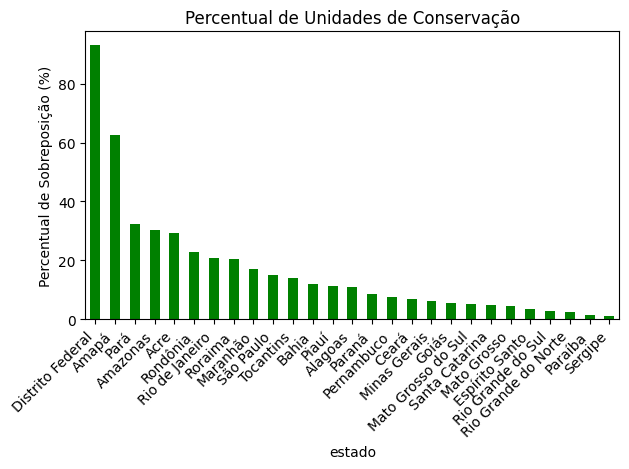

In [ ]:
estados_ordenados = estados.sort_values(by='percentual_uc', ascending=False)

# Plote o gráfico de barras
plt.figure(figsize=(12, 6))
estados_ordenados.plot.bar(x='NM_ESTADO', y='percentual_uc', color='green', legend=None)
plt.title('Percentual de Unidades de Conservação')
plt.ylabel('Percentual de Sobreposição (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exiba o gráfico
plt.show()